# Is It Real, or Just Luck?

One of the main problems of making inferences from data is that our brains are wired to see what we want to see. We can't help it! We're human. Our beliefs have a tendency to cloud our judgement. It's an understatment to say that a lot of work has been done attempting to systematize the process of evaluating data to determine if an effect is real or just a "statistical fluctuation". One of the main approaches, which I'm sure you'll encounter at some point, is the idea of [Null Hypothesis Testing](https://imsmwu.github.io/MRDA2017/_book/hypothesis-testing.html). This is the idea that you first propose the opposite of what you really *hope* you'll measure, and then you go about proving that what you hope is not true, is really *not* true. This gets to be pretty complicated an confusing pretty quickly, so much so, that there are now armies of statistical experts who's job is to explain this idea to the rest of us so we can move on with our lives. These experts also provide tools (computer programs) and rules like these (from Mclreath, Statistical Rethinking):

![Flow Chart for Statistical Tests for Hypothesis Testing](https://imsmwu.github.io/MRDA2017/_book/_main_files/figure-html/unnamed-chunk-101-1.png)

Unless you are one of these statistical experts, you are doomed to using a chart like this to choose among a litany of statistical tests that are specifically designed for special situations, that may be subtly different from your actual situation, but maybe close enough, but maybe not! 

# The Bayesian Approach

If you look in this repository you'll find two [previous](http://localhost:8888/notebooks/proj4/OLD%20Hypothesis%20Testing%20(No%20Longer%20Used).ipynb) [notebooks](REALLY_OLD_HypothesisTesting_NOTEBOOK_Ignore.ipynb) from prior years where I attempted to teach the traditional null hypothesis testing business. It's hard. Folks are confused! This year, I'm trying something different. We're going 100% [Bayesian](https://en.wikipedia.org/wiki/Bayesian_statistics). This means we don't need to worry about "what's a null hypothesis", or "what's a p-value". Yeah! I feel better already. However we do need to learn some tools to make Bayesian inference easier.

## Previous Problems

You've already used Bayesian inference in some examples (remember the socks in the drawers? or the four-sided, six-sided, and eight-sided dice?). You've also seen some generative models (e.g., the diode model, and the transistor model). Our basic plan with statistical analysis for most of the rest of this semester will be to apply Bayesian analysis to glean meaning from the data we collect. Here's the setup:

1. We have a generative model with unknown parameters (our hypotheses) that, potentially, explain the data we measure. This model has to make *sense* (i.e., has some logical structure in which the parameters have meaning).
2. We collect data from the real world that could be produced by the generative model.
3. We use Bayesian update to determine the posterior probability distribution of the parameters in the model
4. We sample from the posterior distribution to make inferences from the data.

In order to make this as *easy* as possible, I'm introducing three new python modules. I know, that might sound intimidating, but we'll only be using a few functions from each module.

* [Arviz](https://github.com/arviz-devs/arviz) Visualization library for Bayesian Inference results.
* [Seaborn](https://seaborn.pydata.org) General Purpose statistical visualization library
* [PyMC3](https://docs.pymc.io) Bayesian Inference through Markov Chain Monte Carlo library.


Before you need to analyze your own data, let's work through some examples with these modules to see how they can work together to help you perform Bayesian inference.

## Example



In [7]:
import pymc3 as pm
import arviz as az
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

print(f"Running PyMC3 v{pm.__version__}")
print(f"Running ArviZ v{az.__version__}")
print(f"Running Seaborn v{sns.__version__}")
print(f"Running numpy v{np.__version__}")
print(f"Running matplotlib v{matplotlib.__version__}")


Running PyMC3 v3.10.0
Running ArviZ v0.10.0
Running Seaborn v0.11.1
Running numpy v1.19.4
Running matplotlib v3.3.3


Let's go back to one of our first statistical problems relating to a collection of normally distributed data. Do you recall this exercise?

Exercise 1 (DALO-3): Create a distribution of 10,000 random numbers drawn from a normal distribution with a mean of $\mu=25$ and a standard deviation of $\sigma=6$. 

Suppose we have some data we collected from a process that we believe should result in a single number (e.g., the light level in a room over a short period of time). This normal distribution might be reasonable if the light level is low, and the sensor is a bit "noisy".

Let's generate such a collection, and use seaborn to visualize the distribution:

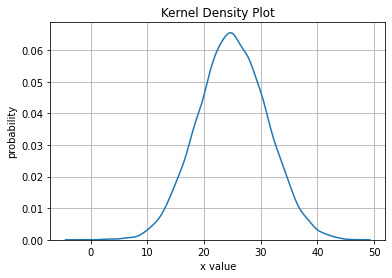

In [9]:
N = 10000
x = np.random.normal(size=N)*6 + 25
sns.kdeplot(x)
plt.xlabel('x value')
plt.ylabel('probability')
plt.title('Kernel Density Plot')
plt.grid()

Let's suppose we *know* that x is between 10 and 50, and we're pretty sure the standard deviation is less than 20. We can start with prior distributions for $\mu$ and $\sigma$ that are pretty broad, but reasonable. The simplest (though not necessarily the best) is probably a Uniform prior.


In [31]:
import empiricaldist as emp

pmf = emp.Pmf

ModuleNotFoundError: No module named 'empiricaldist'

In [26]:
with pm.Model() as model:
    mu = pm.Uniform("mu", lower=10, upper=50) # somewhere between 10 and 50
    sigma = pm.Uniform("sigma", lower=0, upper=20) # Must be positive. Less than 20
    x_obs = pm.Normal("x_obs", mu=mu, sigma=sigma, observed=x[:100])

In [27]:
model

In [28]:
with model:
    trace = pm.sample(1000, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 16 seconds.


In [29]:
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu,24.837,0.638,23.668,25.993,0.011,0.008,3549.0,3549.0,3576.0,2397.0,1.0
sigma,6.361,0.469,5.548,7.315,0.008,0.006,3622.0,3584.0,3668.0,2727.0,1.0


array([[<AxesSubplot:title={'center':'mu'}>,
        <AxesSubplot:title={'center':'mu'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

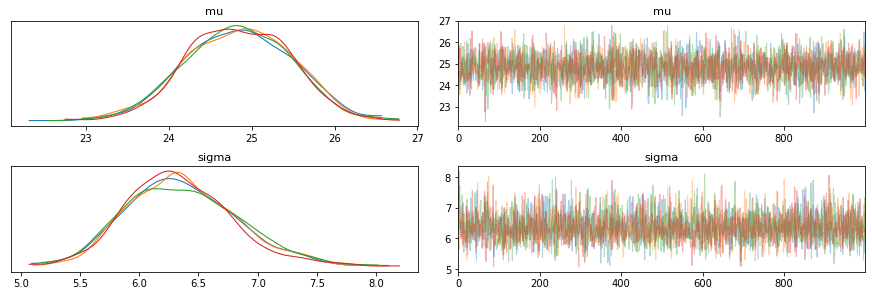

In [30]:
az.plot_trace(trace)